In [ ]:
pip install pandas numpy tensorflow keras-preprocessing scikit-learn matplotlib seaborn wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 583.5 kB/s eta 0:00:00


In [ ]:
import re
import pandas as pd
import numpy as np
import tensorflow as tf
from keras_preprocessing import text
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Embedding, GRU, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator

In [ ]:
#Load data and create model
vocab_size = 10000
embedding_dim = 128
gru_units = 64
num_classes = 3
max_len = 100
data_path = "/content/Finance_news_classified_dataset.csv"
data = pd.read_csv(data_path)

In [ ]:
data.head()
data['Sentiment'].value_counts()

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

<ipython-input-12-f22e1df93876>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sentiment',data=data,palette ='coolwarm')


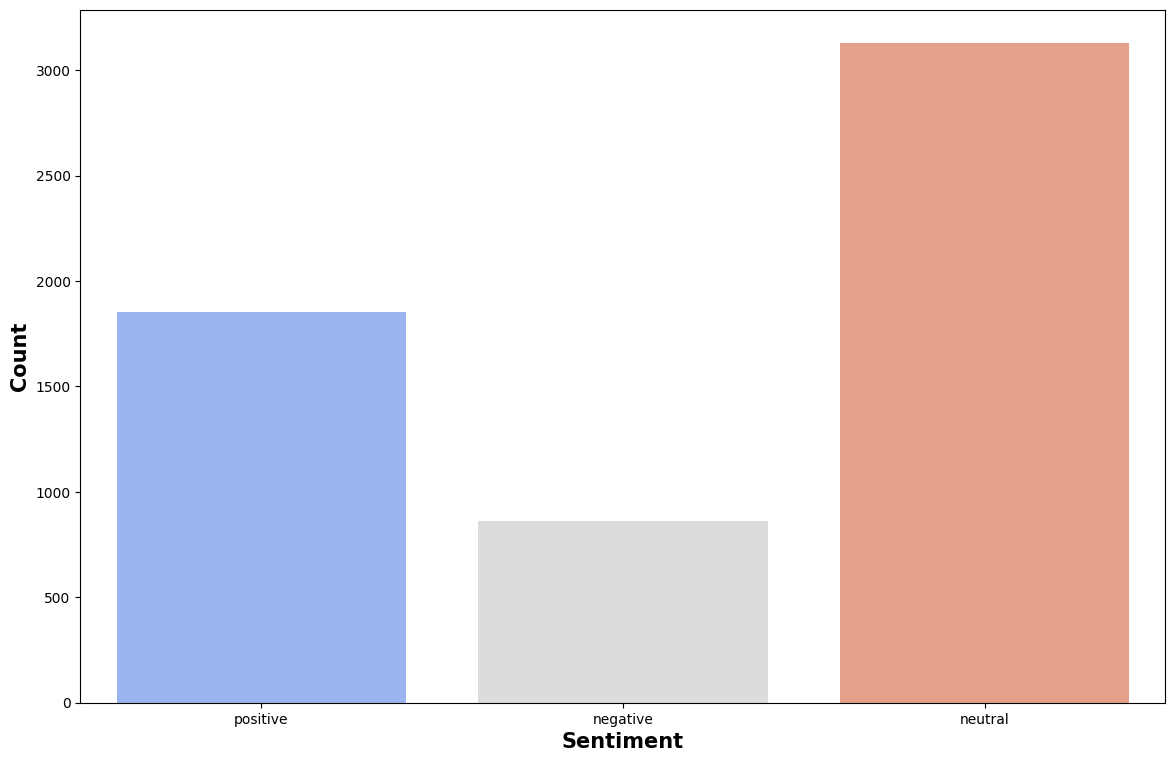

In [ ]:
plt.figure(figsize=(14,9))
sns.countplot(x = 'Sentiment',data=data,palette ='coolwarm')
plt.xlabel("Sentiment",fontweight='bold',size=15)
plt.ylabel("Count",fontweight='bold',size=15)
plt.show()

In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(data)):
  review = re.sub('[^a-zA-Z]', ' ', data['Sentence'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


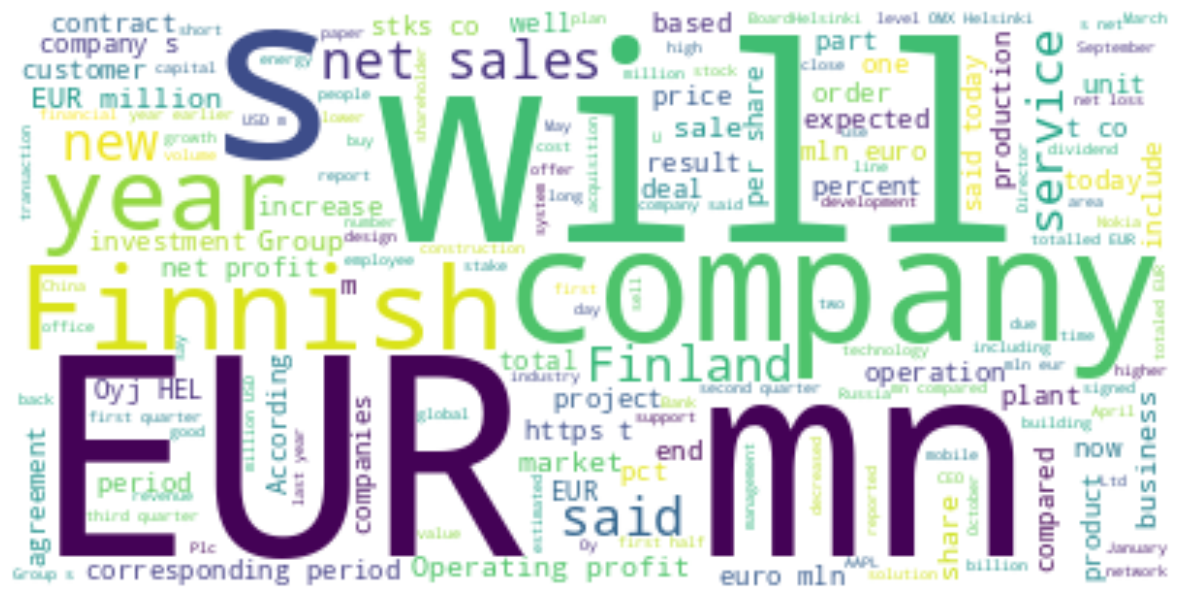

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(i for i in data.Sentence)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("Sentiment")
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1
...,...,...
5837,RISING costs have forced packaging producer Hu...,0
5838,Nordic Walking was first used as a summer trai...,1
5839,"According shipping company Viking Line , the E...",1
5840,"In the building and home improvement trade , s...",1


In [ ]:
import re
import pandas as pd
import numpy as np
import tensorflow as tf
from keras_preprocessing import text
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Embedding, GRU, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator

In [ ]:
# Define the text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text
# Load and preprocess financial text data
def load_data(data, Sentence, Sentiment):
    data_path = "/content/Finance_news_classified_dataset.csv"
    data = pd.read_csv(data_path)
    texts = data['Sentence']
    labels = data['Sentiment']

 # Preprocess text data
    for i in range(len(texts)):
        texts.iloc[i] = preprocess_text(texts.iloc[i])

    # One-hot encode labels
    encoder = OneHotEncoder()
    labels = encoder.fit_transform(labels.values.reshape(-1, 1)).toarray()
# Tokenize and pad sequence
    vocab_size = 10000   # Define vocabulary size
    max_len = 100      # Define maximum sequence length
    tokenizer = text.Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_len)
    # Split data into training and testing sets


    train_padded_sequences, test_padded_sequences, train_labels, test_labels = train_test_split(padded_sequences, labels, test_size=0.2)

    return train_padded_sequences, test_padded_sequences, train_labels, test_labels, tokenizer
# Define the GRU model (with corrected Embedding layer)
def create_model(vocab_size, embedding_dim, gru_units, num_classes):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim))
    model.add(GRU(gru_units))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_model(model, train_padded_sequences, train_labels, epochs=10):
    model.fit(train_padded_sequences, train_labels, epochs=epochs, validation_split=0.2)


  # Existing code for evaluating model on test data...
def evaluate_model(model, test_padded_sequences, test_labels):
    loss, accuracy = model.evaluate(test_padded_sequences, test_labels)
    print(f'Loss: {loss}, Accuracy: {accuracy:.4f}')

def evaluate_model(model, test_padded_sequences, test_labels):
  loss, accuracy = model.evaluate(test_padded_sequences, test_labels)

  # Predict labels for test data
  predicted_labels = np.argmax(model.predict(test_padded_sequences), axis=1)

  # Calculate precision
  precision = precision_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')

  print(f'Loss: {loss}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}')

def evaluate_model(model, test_padded_sequences, test_labels):
  loss, accuracy = model.evaluate(test_padded_sequences, test_labels)

  # Predict labels for test data
  predicted_labels = np.argmax(model.predict(test_padded_sequences), axis=1)

  # Calculate precision and F1 score
  precision = precision_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')
  f1 = f1_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')

  print(f'Loss: {loss}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}')

def evaluate_model(model, test_padded_sequences, test_labels):
  loss, accuracy = model.evaluate(test_padded_sequences, test_labels)

  # Predict labels for test data
  predicted_labels = np.argmax(model.predict(test_padded_sequences), axis=1)

  # Calculate precision, recall, and F1 score
  precision = precision_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')
  recall = recall_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')
  f1 = f1_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')

  print(f'Loss: {loss}, Accuracy: {accuracy:.4f},\n Precision: {precision:.4f},\n Recall: {recall:.4f},\n F1 Score: {f1:.4f}')



def predict_sentiment(model, tokenizer, text):
    text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)

    prediction = model.predict(padded_sequence)[0]
    predicted_class = np.argmax(prediction)

    sentiment_labels = ['Positive', 'Neutral', 'Negative']
    sentiment = sentiment_labels[predicted_class]

    return sentiment



train_padded_sequences, test_padded_sequences, train_labels, test_labels, tokenizer = load_data(data_path, "Sentence", "Sentiment")

model = create_model(vocab_size, embedding_dim, gru_units, num_classes)

train_model(model, train_padded_sequences, train_labels, epochs=10)

evaluate_model(model, test_padded_sequences, test_labels)

new_text = """Microsoft says it estimates that 8.5m computers around the world were disabled by the global IT outage. It’s the first time that a number has been put on the incident, which is still causing problems around the world. The glitch came from a cyber security company called CrowdStrike which sent out a corrupted software update to its huge number of customers. Microsoft, which is helping customers recover said in a blog post: "we currently estimate that CrowdStrike’s update affected 8.5 million Windows devices."""
predicted_sentiment = predict_sentiment(model, tokenizer, new_text)
print(f"Predicted sentiment for '{new_text}': {predicted_sentiment}")

Epoch 1/10
117/117 [==============================] - 30s 190ms/step - loss: 0.9301 - accuracy: 0.5663 - val_loss: 0.8283 - val_accuracy: 0.6364
Epoch 2/10
117/117 [==============================] - 20s 173ms/step - loss: 0.5863 - accuracy: 0.7576 - val_loss: 0.7268 - val_accuracy: 0.6866
Epoch 3/10
117/117 [==============================] - 10s 89ms/step - loss: 0.3103 - accuracy: 0.8727 - val_loss: 0.8470 - val_accuracy: 0.6888
Epoch 4/10
117/117 [==============================] - 10s 89ms/step - loss: 0.2016 - accuracy: 0.9050 - val_loss: 0.9600 - val_accuracy: 0.6727
Epoch 5/10
117/117 [==============================] - 11s 97ms/step - loss: 0.1544 - accuracy: 0.9184 - val_loss: 1.0615 - val_accuracy: 0.6738
Epoch 6/10
117/117 [==============================] - 11s 97ms/step - loss: 0.1356 - accuracy: 0.9216 - val_loss: 1.3285 - val_accuracy: 0.6364
Epoch 7/10
117/117 [==============================] - 12s 102ms/step - loss: 0.1253 - accuracy: 0.9222 - val_loss: 1.2268 - val_accura

In [ ]:
new_text = """Microsoft says it estimates that 8.5m computers around the world were disabled by the global IT outage. It’s the first time that a number has been put on the incident, which is still causing problems around the world. The glitch came from a cyber security company called CrowdStrike which sent out a corrupted software update to its huge number of customers. Microsoft, which is helping customers recover said in a blog post: "we currently estimate that CrowdStrike’s update affected 8.5 million Windows devices."""
predicted_sentiment = predict_sentiment(model, tokenizer, new_text)
print(f"Predicted sentiment is \"{predicted_sentiment}\" for '{new_text}' ")

1/1 [==============================] - 0s 28ms/step
Predicted sentiment is "Neutral" for 'Microsoft says it estimates that 8.5m computers around the world were disabled by the global IT outage. It’s the first time that a number has been put on the incident, which is still causing problems around the world. The glitch came from a cyber security company called CrowdStrike which sent out a corrupted software update to its huge number of customers. Microsoft, which is helping customers recover said in a blog post: "we currently estimate that CrowdStrike’s update affected 8.5 million Windows devices.' 


In [ ]:
import pickle
model_path = "gru_model.h5"
tokenizer_path = "tokenizer.pkl"

# Save the trained model and tokenizer
def save_model_and_tokenizer(model, tokenizer, model_path, tokenizer_path):
    model.save(model_path)
    with open(tokenizer_path, 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the model and tokenizer
save_model_and_tokenizer(model, tokenizer, model_path, tokenizer_path)

In [ ]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3